# What are customer like in Ford gobike?

# Investigation overview

Here we will take a look at the users of Ford gobike behavior.

We will foucas on multiple areas like gender, type of users, age and time.

# About the dataset

Ford gobike dataset is about 2 years of data, containing more than 3 million rows.

This dataset needed some cleaning, we removed some attributes such as start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude since we don't need the exact cordenaite.

We also removed some outliers such as 141 years old user. We removed all users over 61 years old since 97.5 of all users are younger or equal to 61

We also change and fixed the data type of all the attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os as os
import io as io
import zipfile as zp
import requests as rq

In [2]:
df = pd.read_csv('clean_fordgobike_data.csv')


C:\Users\abmalessa\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Average age of user per gender

We have over 3,200,000 users. Over 2,250,000 are male and over 700,000 are female. There are some users who have a missing value in gender, so these people are categorized as others.

The youngest person in the dataset is 18 years old. And after removing the outliers the oldest person is 61 years old. 

We found that the female users are younger in average than the male users, with about only one year. 

- Male have 35.47 years as an average

- Female have 34.20 years as an average

This is not a huge different.

In [3]:
df['member_age'] = 2019 - df['member_birth_year']
age = df[df.member_age != 2019]
age = age.query('member_age <=61')
GenderMean = age.groupby('member_gender').mean()


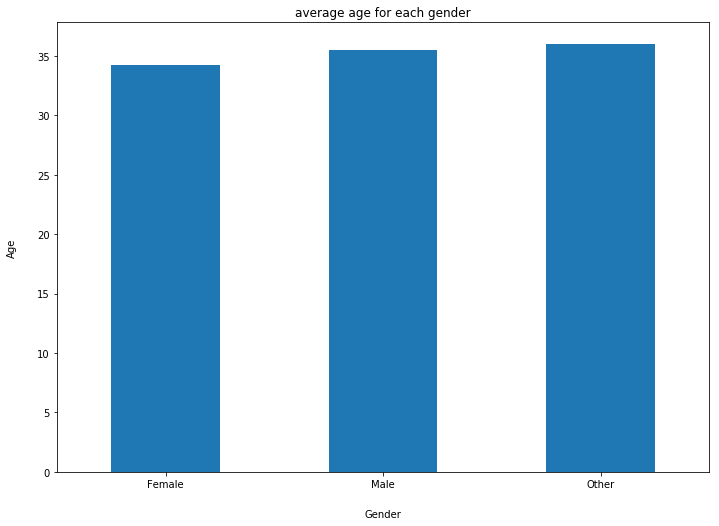

In [4]:
ax = GenderMean.plot(kind='bar', y='member_age',title='average age for each gender', figsize=(11.69,8.27), legend=False)
for tick in ax.get_xticklabels():
    tick.set_rotation(360)
ax.set_xlabel("Gender", labelpad=20)
ax.set_ylabel("Age",  labelpad=20);

# User type per gender

Ther are two type of users, users with a monthly membership ("Subscriber"), and users who are a casual riders ("Customer").
- 84.4% of all users are Subscribers.
- 15.6% of all users are Customers.

For male users:
- 2019034 Subscribers and 232094 customers.

This means that 89.7% of all male users are Subscribers and 10.3% are customers.

For female users:
- 629327 subscribers and 106363 customers.

This means that 85.5 of all male users are Subscribers and 14.4% are customers.



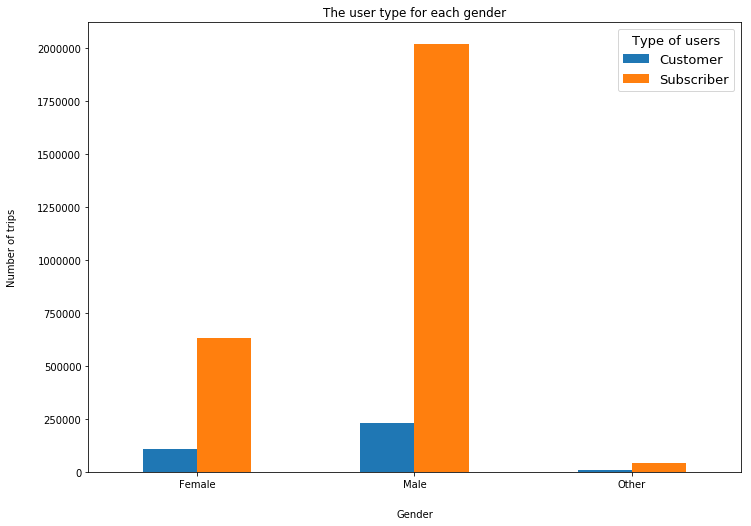

In [5]:
ax = pd.crosstab(df['member_gender'], df['user_type']).plot(kind='bar',figsize=(11.69,8.27), stacked=False, title='The user type for each gender')
for tick in ax.get_xticklabels():
    tick.set_rotation(360)
ax.set_xlabel("Gender", labelpad=20)
ax.set_ylabel("Number of trips", labelpad=20)
t= ax.legend(prop={'size': 13}, title="Type of users");
title = t.get_title()
title.set_fontsize(13)



# Trips per age

We split all ages into 4 groups, as follow:

    - From 18 to 30
    - From 31 to 40
    - From 41 to 50
    - More than 50

We found that it used to be people form 31 to 40 who are using gobike the most. However, after mid-2018, the number of younger people (from 18 to 30) have increased. Now they are the one who uses gobike the most.

This could be an indication that the company used a different approach to attract younger people.


In [6]:
age['member_age_as_group'] = age['member_age'].apply(lambda x: 'From 18 to 30' if 0<x<=30
                                                  else 'From 31 to 40' if 30<x<=40
                                                  else 'From 41 to 50' if 40<x<=50
                                                  else 'More than 50' if 50<x
                                                  else x)

In [7]:
age['start_time'] = pd.to_datetime(age.start_time)


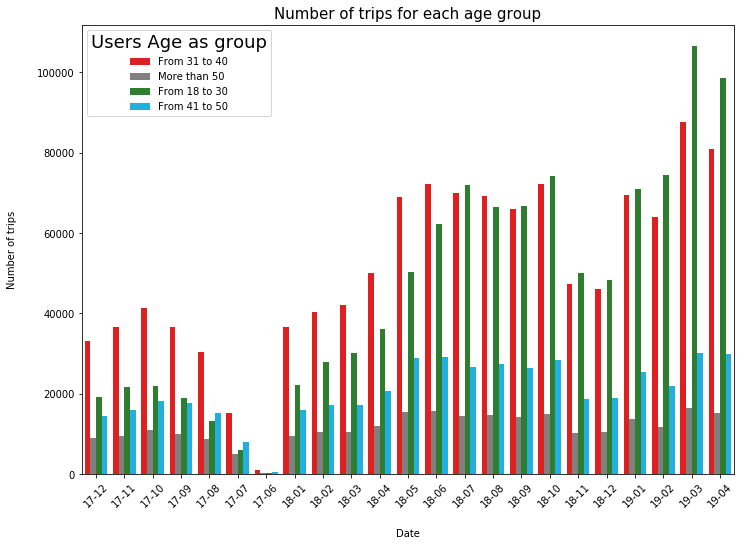

In [8]:
plt.figure(figsize=(11.69,8.27))
ax = sb.countplot(x=age['start_time'].dt.strftime('%y' + '-' + '%m'), hue='member_age_as_group', palette={'From 18 to 30': 'forestgreen', 'From 31 to 40': 'r', 'From 41 to 50': 'deepskyblue', 'More than 50': 'grey'}, data=age )
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.title('Number of trips for each age group', fontsize=15, y=1)
plt.xlabel('Date', labelpad=20)
plt.ylabel('Number of trips', labelpad=20)
legend = ax.legend()
legend.set_title('Users Age as group', prop={'size':18})
ax = plt.gca()

# Trips per day

At the beginning (From 2017-07 to 2018-04), the number of trips never exceed 6000 trips per day. However, from (2018-5 to 2018-11) was almost always over 6000 trip per day.

At (2019-4), the number of trips per day hit its maximum, by reaching 12000 trips per day

This could be an indication that this service is working very well, and people are liking it.

This also could be an indication that the population of the city of San Francisco has increased in the last two years.


In [9]:
df['start_time'] = pd.to_datetime(df.start_time)


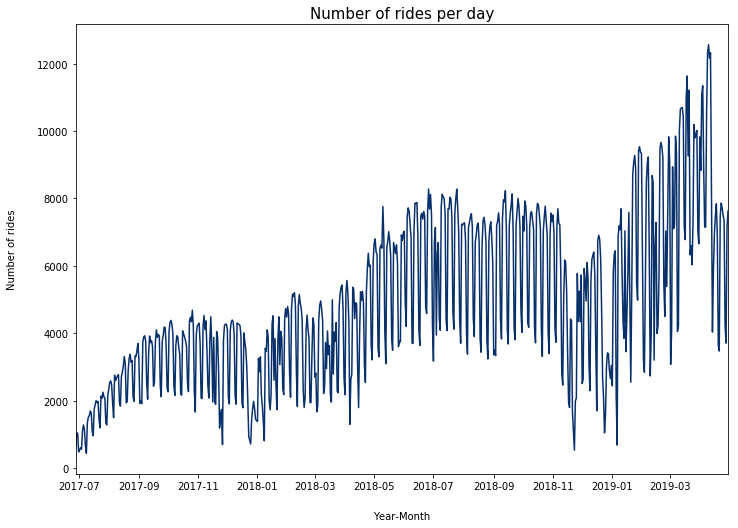

In [10]:
df.groupby(df['start_time'].dt.date).agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(11.69,8.27), colormap='Blues_r')
plt.title('Number of rides per day', fontsize=15, y=1)
plt.xlabel('Year-Month', labelpad=20)
plt.ylabel('Number of rides', labelpad=20);